## Problem 1 - Dueling estimators

In this problem, we use simulation to compare three estimators of the mean of a Normal (Gaussian) distribution.

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as py

A) What shape should the histogram have (explain why)? What is the (theoretical) variance of the average of 10 values drawn from a univariate Gaussian (derive this)? Is the empirical variance of your 10,000 estimates close to this?

Given that the 10 sample vectors $samples_n (n=1,..,10)$ are sampled from a gaussian distribution, the average can be calculated with the following formula: $\frac{1}{10}\sum_{n=1}^{10} x_n $ where $x_n$ represents the univariate gaussian variables from which the samples where drawn. Thus this equation depends on the a sum of gaussian variables, and as it has been derived in class the sum of gaussian variables is a gaussian variable $\hat{X}=~N(\hat{\mu},\hat{\sigma}^2)$, where $\hat{\mu} = \sum_{n=1}^{10} \mu _{n}$ and $\hat{\sigma}^2 = \frac{1}{10^2}\sum_{n=1}^{10} \sigma^2 _{n}$. So since all the gaussian variables have a $\mu_n = 0$ and $\sigma=1$, we expect that the average estimator to be a gaussian variable with $\mu = 0$ and $\sigma^2=\frac{1}{10}$. Both the expected distribution and the calculated theoretical variance match the results shown above.

The variance of the average estimatior is 0.09794489075892245


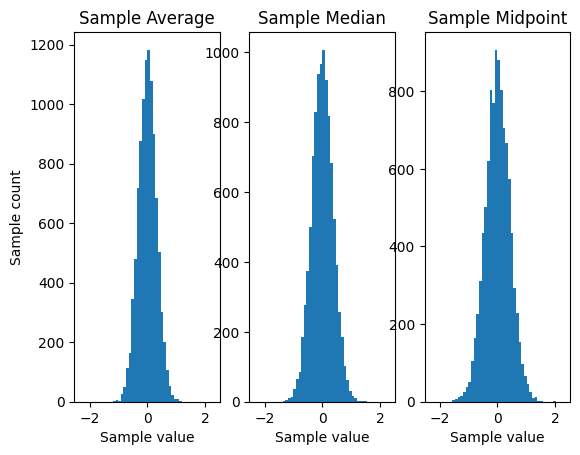

In [14]:
# Generate 10k samples each of size 10 drawn from 1-dimensional gaussian variables ~N(0,1)
samples = np.zeros((10000,10))
for i in range(10):
    samples[:,i] = np.transpose(np.random.normal([0], [1], size=10000)) #Sampling from a N-dimensional Gaussian with zero mean and identity covariance
    np.shape(samples[i,:])
# Compute the average of each of the 10,000 samples
sample_avg = np.average(samples,axis=1)
var_avgEstimator = np.var(sample_avg)
print('The variance of the average estimatior is {}'.format(var_avgEstimator))
# Compute the median of each of the 10,000 samples
sample_median = np.median(samples,axis=1)
# Compute the mid point of each of the 10,000 samples
max_samples = np.amax(samples,axis=1) 
min_samples = np.amin(samples,axis=1)
sample_midpoint = np.add(max_samples,min_samples)*(1/2)

# ----------- Estimator Histograms ------------
fig,ax = plt.subplots(1,3,sharex='all')
# Histogram of mean 
ax[0].hist(sample_avg,bins=50,range=(-2.3,2.3))
ax[0].set_title('Sample Average')
ax[0].set_ylabel('Sample count')
ax[0].set_xlabel('Sample value')
# Histogram of median 
ax[1].hist(sample_median,bins=50,range=(-2.3,2.3))
ax[1].set_title('Sample Median')
# ax[1].set_ylabel('Sample count')
ax[1].set_xlabel('Sample value')
# Histogram of midpoint
ax[2].hist(sample_midpoint,bins=50,range=(-2.3,2.3))
ax[2].set_title('Sample Midpoint')
ax[2].set_xlabel('Sample value')
plt.show()



B) Now consider the median, Does the distribution of estimated values deviate signifficantly from a Normal distribution? Speciffically, compare the Q-Q plot for the median estimator to that for the mean from part (A).

As one can analyze from the Q-Q plot, the median estimator is normally distributes as the data points align with the 45° line, however we see that when comparing it to the average estimator the median estimationrs show a few outliers in the upper quartile.

C) Finally, consider an estimator that computes the average of the minimum and maximum over the sample. Examine and comment on
the Q-Q plot, just as in part (B).

From the Q-Q plot for the midpoint estimator we can see that the uper quartile presentes a highe outlier, and even though the distribution is normal, there appears to be a higher variability in the histogram of this estimator.  

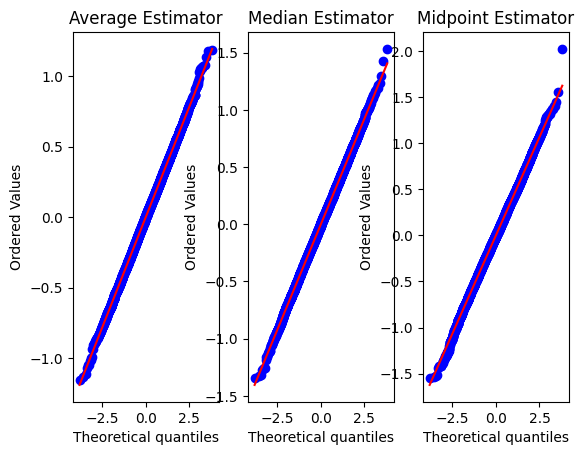

In [15]:
# ---------- Estimator Q-Q Evaluation -------------
fig,ax = plt.subplots(1,3,sharex='all')
stats.probplot(sample_avg,plot=ax[0])
ax[0].set_title('Average Estimator')
stats.probplot(sample_median,plot=ax[1])
ax[1].set_title('Median Estimator')
stats.probplot(sample_midpoint,plot=ax[2])
ax[2].set_title('Midpoint Estimator')
py.show()

D) Generate a new set of 10,000 samples, this time of dimension 256. Apply each estimator to sub-matrices of samples of size 8; 16; 32; 64; 128; 256g, and compute the variance of each estimator for each. Plot these (on a single log-log plot), along with a line showing the theoretically-computed variance of the average estimator.

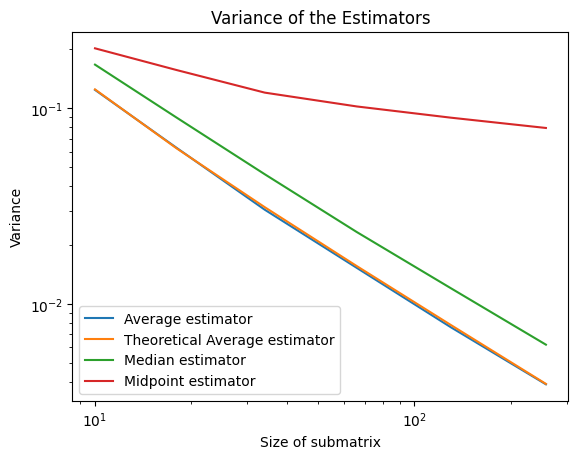

In [51]:
# Generate 10k samples each of size 256 drawn from 1-dimensional gaussian variables ~N(0,1)
samples = np.random.multivariate_normal(np.zeros(256), np.identity(256), size=10000) #Sampling from a N-dimensional Gaussian with zero mean and identity covariance
submatrix_index = [9,17,33,65,129,257]
avg_var = []
avg_theoVar = []
median_var = []
midpoint_var = []
for i in range(6):
    index = submatrix_index[i]
    submatrix = samples[:,1:index]
    # Calculate average estimator and its variance (theroretical and empirical)
    sample_avg = np.average(submatrix,axis=1)
    avg_var.append(np.var(sample_avg))
    avg_theoVar.append(1/(index-1))
    # Calculate median estimator and its variance
    sample_median = np.median(submatrix,axis=1)
    median_var.append(np.var(sample_median))
    # Calculate midpoint estimator and it variance
    max_submatrix = np.amax(submatrix,axis=1) 
    min_submatrix = np.amin(submatrix,axis=1)
    sample_midpoint = np.add(max_submatrix,min_submatrix)*(1/2)
    midpoint_var.append(np.var(sample_midpoint))

fig,ax = plt.subplots()
x_data = np.add(submatrix_index,np.ones(len(submatrix_index)))
ax.set_title('Variance of the Estimators')
ax.set_ylabel('Variance')
ax.set_xlabel('Size of submatrix')
ax.plot(x_data,avg_var,label = 'Average estimator')
ax.plot(x_data,avg_theoVar,label = 'Theoretical Average estimator')
ax.plot(x_data,median_var,label = 'Median estimator')
ax.plot(x_data,midpoint_var,label = 'Midpoint estimator')
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


We can see that the variance of the average estiomater is very close to that from the theoretical calculation, Additionally, we can see that that rate of convergence for the median estimatior and the average estimator is much greater than that for the midpoint estimator.